В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars_df = pd.read_csv('cars.csv') #завантажив набір даних

In [3]:
cars_df.head() # вивів перші 5 записів через .head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
cars_df.shape

(100, 13)

Спостереження: фактично у нас невеличка база розміром 100 на 13.

**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [5]:
cars_df.info() #перевірив типи даних
cars_df.dtypes.value_counts() # перевірив кількість типів даних

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


int64     8
object    5
dtype: int64

In [6]:
cars_columns = cars_df.select_dtypes(include=['object']).columns.tolist() # зробив список стовпців, де є тип даних object
cars_columns

['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [7]:
def analyze_columns(df, columns): # функція, щоб перевірити тип даних та кількість унікальних значень за кожною з колонок, де є object
    results = {}
    for col in columns:
        if col in df.columns:
            results[col] = {
                'dtype': df[col].dtype,                # Тип даних
                'nunique': df[col].nunique(),         # Кількість унікальних значень
                }
    return results

In [8]:
analyze_columns(cars_df, cars_columns)

{'Brand': {'dtype': dtype('O'), 'nunique': 11},
 'Model': {'dtype': dtype('O'), 'nunique': 58},
 'Fuel_Type': {'dtype': dtype('O'), 'nunique': 2},
 'Transmission': {'dtype': dtype('O'), 'nunique': 2},
 'Owner_Type': {'dtype': dtype('O'), 'nunique': 3}}

**Висновок Завдання 2** 
В наборі даних 8 числових і 5 категоріальних колонок з них:
- 2 бінарні (мають лише 2 значення)
- 3 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#input_cols = 
inputs = cars_df
targets = cars_df['Price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [12]:
cars_df['Fuel_Type'].unique()

array(['Petrol', 'Diesel'], dtype=object)

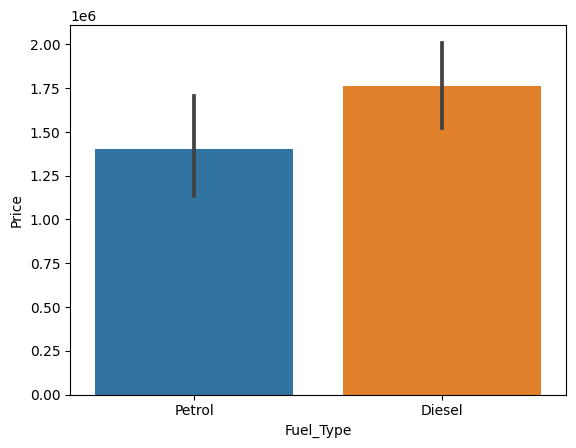

In [13]:
sns.barplot(data=cars_df, x='Fuel_Type', y='Price');

In [14]:
# у нас виявилося, що дизелю більше, тому беремо для нього 1
fuel_codes = {'Petrol': 0, 'Diesel': 1}
cars_df['Fuel_Type_Code'] = cars_df['Fuel_Type'].map(fuel_codes)

In [15]:
cars_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

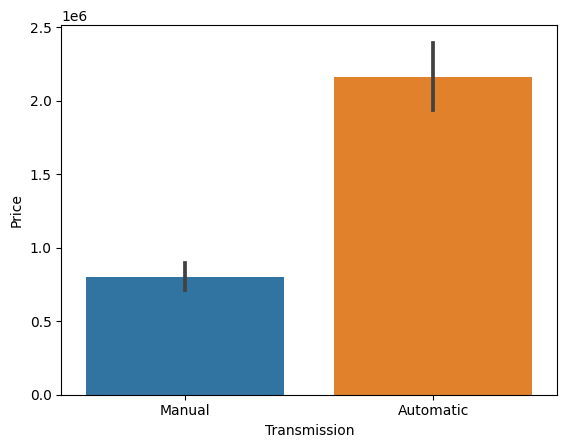

In [16]:
sns.barplot(data=cars_df, x='Transmission', y='Price');

In [17]:
# у нас виявилося, що автоматики більше, тому беремо для неї 1
transmission_codes = {'Manual': 0, 'Automatic': 1}
cars_df['Transmission_Code'] = cars_df['Transmission'].map(transmission_codes)

In [122]:
transm_codes = {'Manual': 0, 'Automatic': 1} #додаю в X_test i X_train
X_test['Transmission_Type_Code'] = X_test['Transmission'].map(transm_codes)
X_train['Transmission_Type_Code'] = X_train['Transmission'].map(transm_codes)

In [123]:
fuel_codes = {'Petrol': 0, 'Diesel': 1} #додаю в X_test i X_train
X_test['Fuel_Type_Code'] = X_test['Fuel_Type'].map(fuel_codes)
X_train['Fuel_Type_Code'] = X_train['Fuel_Type'].map(fuel_codes)

Пункт 2 завдання

In [124]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [125]:
one_hot = enc.transform(X_train[['Brand']]).toarray()

In [126]:
enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [127]:
X_train[enc.categories_[0]] = one_hot

In [128]:
one_hot_2 = enc.transform(X_test[['Brand']]).toarray()

In [129]:
X_test[enc.categories_[0]] = one_hot_2

Завдання 3

In [130]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

**Спостереження** 
Ми бачимо перетворення категоріальних значень в числові. Це дає можливість не створювати колонки для кожного значення окремо.

Очікуваний результат після трансформацій:

In [132]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Owner_Type_Codes,Fuel_Type_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Transmission_Type_Code
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1600000,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,2600000,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,3200000,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,2500000,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Owner_Type_Codes,Fuel_Type_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Transmission_Type_Code
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1900000,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,450000,2.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,850000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,600000,2.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [156]:
X_train_numeric = X_train.select_dtypes(include=['number']) # спочатку забув видалити Price з переліку змінних
X_train_numeric.head(5)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Owner_Type_Codes,Fuel_Type_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Transmission_Type_Code
83,84,2019,22000,18,1498,148,5,1600000,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
55,56,2018,28000,17,1968,187,5,2600000,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
26,27,2018,28000,15,1984,241,5,3200000,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
54,55,2017,32000,18,1598,103,5,650000,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
19,20,2017,26000,12,1991,241,5,2500000,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [157]:
X_train_numeric_2 = pd.concat([X_train_numeric, y_train], axis=1)
X_train_numeric_2.head(3)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Owner_Type_Codes,Fuel_Type_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Transmission_Type_Code,Price
83,84,2019,22000,18,1498,148,5,1600000,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1600000
55,56,2018,28000,17,1968,187,5,2600000,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2600000
26,27,2018,28000,15,1984,241,5,3200000,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3200000


In [158]:
correlation_matrix = X_train_numeric_2.corr()
correlation_matrix

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Owner_Type_Codes,Fuel_Type_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Transmission_Type_Code,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.025560,0.038923,-0.090537,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,-0.084381,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,-0.233769,-0.014499,-0.248515,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.200603,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.083951,-0.001772,0.332351,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.066491,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.638404,0.026624,0.070112,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,-0.399164,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,0.710561,-0.196106,0.174455,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,0.456296,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.849137,-0.204309,-0.076357,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,0.586910,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,0.000979,-0.043849,0.412468,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.070099,0.000979
Price,0.025560,-0.233769,-0.083951,-0.638404,0.710561,0.849137,0.000979,1.000000,-0.265537,0.110782,0.328858,0.477522,-0.004592,-0.209779,-0.263022,-0.178627,-0.249737,0.431606,-0.341815,-0.023778,-0.158742,0.680731,1.000000
Owner_Type_Codes,0.038923,-0.014499,-0.001772,0.026624,-0.196106,-0.204309,-0.043849,-0.265537,1.000000,-0.281122,-0.203925,0.009076,0.190586,-0.177705,0.297594,0.035088,0.217195,-0.172435,-0.375748,-0.012745,0.301080,0.005886,-0.265537
Fuel_Type_Code,-0.090537,-0.248515,0.332351,0.070112,0.174455,-0.076357,0.412468,0.110782,-0.281122,1.000000,0.008336,0.048475,-0.109812,0.161425,0.007121,0.235225,-0.148511,0.048475,-0.066164,0.008336,-0.125010,0.005775,0.110782


In [159]:
target_correlations = correlation_matrix[y_train.name]
target_correlations

,Price,Price
Car_ID,0.025560,0.025560
Year,-0.233769,-0.233769
Kilometers_Driven,-0.083951,-0.083951
Mileage,-0.638404,-0.638404
Engine,0.710561,0.710561
Power,0.849137,0.849137
Seats,0.000979,0.000979
Price,1.000000,1.000000
Owner_Type_Codes,-0.265537,-0.265537
Fuel_Type_Code,0.110782,0.110782


In [62]:
strong_correlations = target_correlations[target_correlations.abs() > 0.5]
strong_correlations

,Price,Price
Car_ID,NaN,NaN
Year,NaN,NaN
Kilometers_Driven,NaN,NaN
Mileage,-0.638404,-0.638404
Engine,0.710561,0.710561
Power,0.849137,0.849137
Seats,NaN,NaN
Price,1.000000,1.000000
Owner_Type_Codes,NaN,NaN
Fuel_Type_Code,NaN,NaN


**Висновки Завдання 6.** Лише декілька змінних корелюють з цільовою змінною більш ніж на 0,5 за модулем. Зокрема це кілометраж, двигун та потужність.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [165]:
X_test_numeric_2 = X_test.select_dtypes(include=['number']).drop(columns=['Price'])

In [166]:
X_train_numeric_2 = X_train_numeric.drop(columns=['Price'])

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [168]:
model = LinearRegression() # тренуємо лінійну регресію.
model.fit(X_train_numeric_2, y_train)

LinearRegression()

In [170]:
y_train_pred = model.predict(X_train_numeric_2)
y_test_pred = model.predict(X_test_numeric_2)

In [171]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [172]:
print(f"RMSE,Train: {train_rmse}")
print(f"RMSE, Test: {test_rmse}")

RMSE,Train: 210293.578281518
RMSE, Test: 258181.56112032835


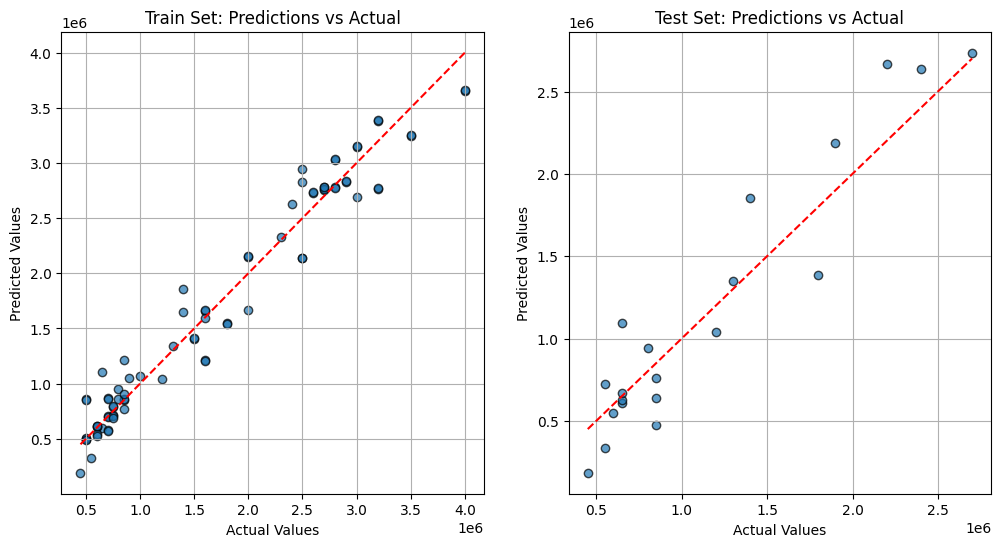

In [174]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, edgecolors='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title("Train Set: Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Графік для тестувального набору
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Test Set: Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

**Висновок.** Модель не дуже ідеальна, оскільки передбачувані та реальні значення достатньо відхиляються від прямої функції. Це ми бачимо і по значеннях RMSE - вони досить великі.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [175]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [176]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric_2)

In [177]:
X_test_scaled = scaler.transform(X_test_numeric_2)

In [189]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_numeric_2.columns)


In [179]:
print(X_train_scaled.shape)  # має бути (n_samples, n_features)
print(y_train.shape)

(80, 21)
(80,)


In [180]:
model_2 = LinearRegression()

In [181]:
model_2.fit(X_train_scaled, y_train)

LinearRegression()

In [182]:
model_2.coef_, model_2.intercept_

(array([   5608.68542149,   -8765.64571392,  -94398.72148597,
        -131715.51202972,  -21377.45333789,  496769.21489874,
          -2148.92454899,   42344.95281544,  183848.01890892,
         205600.14776875,  208407.31378257, -118209.45031066,
         -62753.005386  , -152304.86391146, -140945.16290405,
        -112259.96701985,  210048.78114763,  -65996.24697212,
          15805.70151142,  -92968.2600652 ,  116693.76820576]),
 1680000.0000000002)

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [183]:
X_train_scaled_const = sm.add_constant(X_train_scaled)

In [184]:
model_3 = sm.OLS(y_train, X_train_scaled_const)
results_3 = model_3.fit()

In [190]:
print(X_test_scaled_df.columns)

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Owner_Type_Codes', 'Fuel_Type_Code', 'Audi', 'BMW', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Transmission_Type_Code'],
      dtype='object')


In [186]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        23:52:11   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.74e+04     61.363      0.000    1.63e+06    1.73e+06
x1          5608.6854   3.37e+04      0.166      0.869   -6.19e+04    7.31e+04
x2         -8765.6457   6.09e+04     -0.144      0.886   -1.31e+05    1.13e+05
x3          -9.44e+04   6.51e+04     -1.449      0.153   -2.25e+05    3.59e+04
x4         -1.317e+05   5.83e+04     -2.259      0.028   -2.48e+05    -1.5e+04
x5         -2.138e+04   7.29e+04     -0.293      0.770   -1.67e+05    1.24e+05
x6          4.968e+05   7.54e+04      6.588      0.000    3.46e+05    6.48e+05
x7         -2148.9245   4.22e+04     -0.051      0.960   -8.66e+04    8.23e+04
x8          4.234e+04   4.75e+04      0.892      0.376   -5.27e+04    1.37e+05
x9          1.838e+05   4.57e+04      4.026      0.000    9.25e+04    2.75e+05
x10         2.056e+05   3.05e+04      6.738      0.000    1.45e+05    2.67e+05
x11         2.084e+05   3.19e+04      6.532      0.000    1.45e+05    2.72e+05
x12        -1.182e+05   3.37e+04     -3.507      0.001   -1.86e+05   -5.08e+04
x13        -6.275e+04   3.44e+04     -1.825      0.073   -1.32e+05    6034.235
x14        -1.523e+05    2.9e+04     -5.247      0.000    -2.1e+05   -9.42e+04
x15        -1.409e+05   2.97e+04     -4.747      0.000      -2e+05   -8.15e+04
x16        -1.123e+05   2.91e+04     -3.856      0.000   -1.71e+05    -5.4e+04
x17           2.1e+05   3.14e+04      6.682      0.000    1.47e+05    2.73e+05
x18          -6.6e+04   3.95e+04     -1.672      0.100   -1.45e+05     1.3e+04
x19         1.581e+04   3.47e+04      0.456      0.650   -5.36e+04    8.52e+04
x20        -9.297e+04      3e+04     -3.097      0.003   -1.53e+05   -3.29e+04
x21         1.167e+05    4.4e+04      2.653      0.010    2.87e+04    2.05e+05
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.311
Skew:                           0.104   Prob(JB):                        0.856
Kurtosis:                       2.776   Cond. No.                     7.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.68e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [187]:
p_values = results_3.pvalues
print("P-values:", p_values)

P-values: const    3.734558e-55
x1       8.685654e-01
x2       8.860405e-01
x3       1.525755e-01
x4       2.760048e-02
x5       7.703140e-01
x6       1.343837e-08
x7       9.595569e-01
x8       3.762199e-01
x9       1.639420e-04
x10      7.485851e-09
x11      1.669757e-08
x12      8.736558e-04
x13      7.299393e-02
x14      2.204650e-06
x15      1.354686e-05
x16      2.875539e-04
x17      9.320195e-09
x18      9.977434e-02
x19      6.501857e-01
x20      2.993263e-03
x21      1.022962e-02
dtype: float64


Відповіді: значущими є такі ознаки: Милі, Потужність та ще низка ознак.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?